In [138]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2017-yellow-taxi-trip-data-csv/2017_Yellow_Taxi_Trip_Data (1).csv


In [139]:
# 📌 Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Date Conversions for Calculating Trip Durations
from datetime import datetime, date, timedelta

# 📌 Scikit-Learn Packages for Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    ConfusionMatrixDisplay, roc_auc_score, roc_curve, RocCurveDisplay,
    mean_absolute_error, mean_squared_error, r2_score
)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

# 📌 XGBoost Packages
from xgboost import XGBClassifier, plot_importance

In [140]:
df = pd.read_csv("/kaggle/input/2017-yellow-taxi-trip-data-csv/2017_Yellow_Taxi_Trip_Data (1).csv")

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Senaryo 
## Şirketi tanıyalım 
Automatidata works with its clients to transform their unused and stored data into useful solutions, such as performance dashboards, customer-facing tools, strategic business insights, and more. They specialize in identifying a client’s business needs and utilizing their data to meet those business needs. 

Automatidata is consulting for the New York City Taxi and Limousine Commission (TLC). New York City TLC is an agency responsible for licensing and regulating New York City's taxi cabs and for-hire vehicles. The agency has partnered with Automatidata to develop a regression model that helps estimate taxi fares before the ride, based on data that TLC has gathered. 

The TLC data comes from over 200,000 taxi and limousine licensees, making approximately one million combined trips per day. 

Note: This project's dataset was created for pedagogical purposes and may not be indicative of New York City taxi cab riders' behavior.
## Görev 1 : EDA
Luana Rodriquez, the senior data analyst at Automatidata, is pleased with the work you have already completed and requests your assistance with some EDA and data visualization work for the New York City Taxi and Limousine Commission project (New York City TLC) to get a general understanding of what taxi ridership looks like. The management team is asking for a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help understand the data. At the very least, include a box plot of the ride durations and some time series plots, like a breakdown by quarter or month.

Additionally, the management team has recently asked all EDA to include Tableau visualizations. For this taxi data, create a Tableau dashboard showing a New York City map of taxi/limo trips by month. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director at the New York City TLC is a person with visual impairments

The purpose of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables.

The goal is to clean data set and create a visualization.

This activity has 4 parts:

Part 1: Imports, links, and loading

Part 2: Data Exploration

Data cleaning
Part 3: Building visualizations

Part 4: Evaluate and share results

## Görev 2 : Analyze the relationship between fare amount and payment type.
You receive a new email from Uli King, Automatidata’s project manager. Uli tells your team about a new request from the New York City TLC: **to analyze the relationship between fare amount and payment type.** You also discover follow-up emails from three other team members: Deshawn Washington, Luana Rodriguez, and Udo Bankole. These emails discuss the details of the analysis. A final email from Luana includes your specific assignment: to conduct an A/B test.

The purpose of this project is to demostrate knowledge of how to prepare, create, and analyze A/B tests. Your A/B test results should aim to find ways to generate more revenue for taxi cab drivers.

Note: For the purpose of this exercise, assume that the sample data comes from an experiment in which customers are randomly selected and divided into two groups: 1) customers who are required to pay with credit card, 2) customers who are required to pay with cash. Without this assumption, we cannot draw causal conclusions about how payment method affects fare amount.

The goal is to apply descriptive statistics and hypothesis testing in Python. The goal for this A/B test is to sample data and analyze whether there is a relationship between payment type and fare amount. For example: discover if customers who use credit cards pay higher fare amounts than customers who use cash.

## Görev 3 : Regression Analysis 
The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

The purpose of this project is to demostrate knowledge of EDA and a multiple linear regression model

The goal is to build a multiple linear regression model and evaluate the model
This activity has three parts:

Part 1: EDA & Checking Model Assumptions

What are some purposes of EDA before constructing a multiple linear regression model?
Part 2: Model Building and evaluation

What resources do you find yourself using as you complete this stage?
Part 3: Interpreting Model Results

What key insights emerged from your model(s)?

What business recommendations do you propose based on the models built?

## Görev 4: Modelling
 (New York City TLC), was impressed with the work you have done and has requested that you build a machine learning model to predict if a customer will not leave a tip. They want to use the model in an app that will alert taxi drivers to customers who are unlikely to tip, since drivers depend on tips.
 
 The purpose of this model is to find ways to generate more revenue for taxi cab drivers.

The goal of this model is to predict whether or not a customer is a generous tipper.


This activity has three parts:

Part 1: Ethical considerations

Consider the ethical implications of the request

Should the objective of the model be adjusted?

Part 2: Feature engineering

Perform feature selection, extraction, and transformation to prepare the data for modeling
Part 3: Modeling

Build the models, evaluate them, and advise on next steps
Follow the instructions and answer the questions below to complete the activity. Then, complete an Executive Summary using the questions listed on the PACE Strategy Document.

| Sütun Adı             | Açıklama                                                                                                                                                                                                                 |
|-----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ID                    | Yolculuk tanımlama numarası                                                                                                                                                                                              |
| VendorID              | Kaydı sağlayan TPEP sağlayıcısını belirten bir kod. 1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.                                                                         |
| tpep_pickup_datetime  | Taksi metre açıldığında kaydedilen tarih ve saat.                                                                                                                                                                        |
| tpep_dropoff_datetime | Taksi metre kapandığında kaydedilen tarih ve saat.                                                                                                                                                                       |
| Passenger_count       | Araçtaki yolcu sayısı. Bu değer, şoför tarafından girilir.                                                                                                                                                               |
| Trip_distance         | Taksi metre tarafından bildirilen, yolculuk boyunca kat edilen mesafe (mil cinsinden).                                                                                                                                   |
| PULocationID          | Taksi metrenin açıldığı TLC Taksi Bölgesi.                                                                                                                                                                                |
| DOLocationID          | Taksi metrenin kapandığı TLC Taksi Bölgesi.                                                                                                                                                                               |
| RateCodeID            | Yolculuğun sonunda geçerli olan ücret kodu. 1= Standart ücret; 2=JFK; 3=Newark; 4=Nassau veya Westchester; 5=Anlaşmalı ücret; 6=Grup yolculuğu.                                    |
| Store_and_fwd_flag    | Bu bayrak, yolculuk kaydının araç hafızasında tutulup tutulmadığını belirtir. Y= araç hafızasında tutulmuş; N= araç hafızasında tutulmamış.                                        |
| Payment_type          | Yolcunun yolculuk için nasıl ödeme yaptığını belirten bir kod. 1= Kredi kartı; 2= Nakit; 3= Ücretsiz; 4= İtiraz; 5= Bilinmiyor; 6= İptal edilmiş yolculuk.                         |
| Fare_amount           | Taksi metre tarafından hesaplanan zaman ve mesafe ücreti.                                                                                                                                                                |
| Extra                 | Çeşitli ek ücretler ve ek masraflar. Şu anda sadece $0.50 ve $1 yoğun saat ve gece ek ücretlerini içerir.                                                                                                                |
| MTA_tax               | Kullanılan taksimetre ücretine bağlı olarak otomatik olarak tetiklenen $0.50 MTA vergisi.                                                                                                                                |
| Improvement_surcharge | Bayrak düşümünde uygulanan $0.30 iyileştirme ücreti. Bu iyileştirme ücreti 2015 yılında uygulanmaya başlandı.                                                                                                             |
| Tip_amount            | Bahşiş miktarı – Bu alan, kredi kartı bahşişleri için otomatik olarak doldurulur. Nakit bahşişler dahil değildir.                                                                                                        |
| Tolls_amount          | Yolculuk sırasında ödenen toplam geçiş ücreti miktarı.                                                                                                                                                                   |
| Total_amount          | Yolculardan alınan toplam ücret. Nakit bahşişleri içermez.                                                                                                                                                               |

# Görev 1  
Amacımız veri seti hakkında bilgi sahibi olmak. Bunu yaparken Descriptive statistic kullanmak ve görselleştirmeler ile veriye hakim olmak. 

## Descriptive Statistic

In [142]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [143]:
df.size

408582

In [144]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


Fare_amount, total_amount : negatif veriler var burada bir hata olmuş olmalı. 1000 dolar gibi uçuk sayılar da var bunlar kesinlikle outliers. 

extra, mta_tax,improvement_surcharge	: Burada da negatif veriler var

tip_amount: 200 dolar çok yüksek burada bir outliers var 

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [146]:
df.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

Buradan anlaşılacağı üzere boş sütun yok

In [147]:


df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Sonsuz değerleri NaN ile değiştir
df.dropna(inplace=True)  # NaN olan satırları kaldır

In [148]:
# çoğaltılmış değerleri düşürelim 
print('Shape of dataframe with duplicates dropped:', df.drop_duplicates().shape)

Shape of dataframe with duplicates dropped: (22699, 18)


Kopyalanmış veri yokmuş

In [149]:
# Kullanılacak sütunları tanımla
columns = ["fare_amount", "total_amount", "extra", "mta_tax", "improvement_surcharge"]

# Tüm belirtilen sütunlardaki negatif değerleri sıfıra ayarla
df[columns] = df[columns].clip(lower=0)

# Her sütun için minimum değeri yazdır
min_values = df[columns].min()
print("Minimum Değerler:\n", min_values)

Minimum Değerler:
 fare_amount              0.0
total_amount             0.0
extra                    0.0
mta_tax                  0.0
improvement_surcharge    0.0
dtype: float64


In [150]:
# tpep_dropoff_datetime gibi değişkenleri zamana çevirelim 
# Check the format of the data
df['tpep_dropoff_datetime'][0]

# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

# Convert `tpep_pickup_datetime` to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Convert `tpep_dropoff_datetime` to datetime format
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

df.head(3)

Data type of tpep_pickup_datetime: object
Data type of tpep_dropoff_datetime: object
Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75


## Visualisation  

### trip_distance

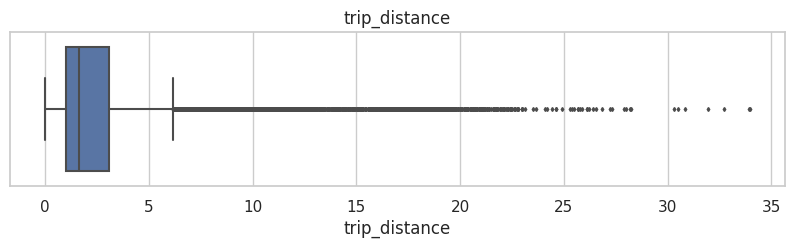

In [151]:
# Create box plot of trip_distance
plt.figure(figsize=(10,2))
plt.title('trip_distance')

sns.boxplot(data=None, x=df['trip_distance'], fliersize=2);

In [152]:
# Q1 ve Q3 hesapla
Q1 = df['trip_distance'].quantile(0.25)  # 1. Çeyrek (25. yüzdelik)
Q3 = df['trip_distance'].quantile(0.75)  # 3. Çeyrek (75. yüzdelik)

# IQR hesapla
IQR = Q3 - Q1

# Alt ve üst sınırları belirle
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerleri filtrele
outliers = df[(df['trip_distance'] < lower_bound) | (df['trip_distance'] > upper_bound)]

# Sonuçları yazdır
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Aykırı değer sayısı: {outliers.shape[0]}")

Q1: 0.99, Q3: 3.06, IQR: 2.0700000000000003
Aykırı değer sayısı: 2527


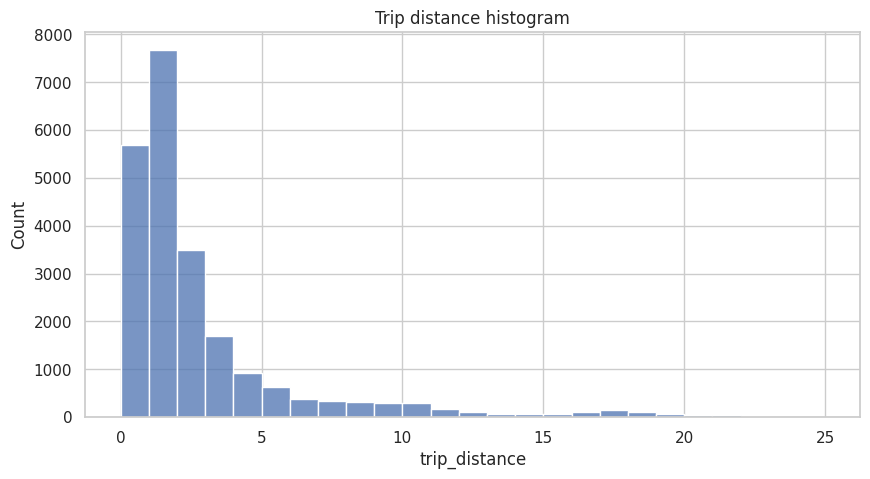

In [153]:
# Create histogram of trip_distance
plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins=range(0,26,1))
plt.title('Trip distance histogram');

### total_amount

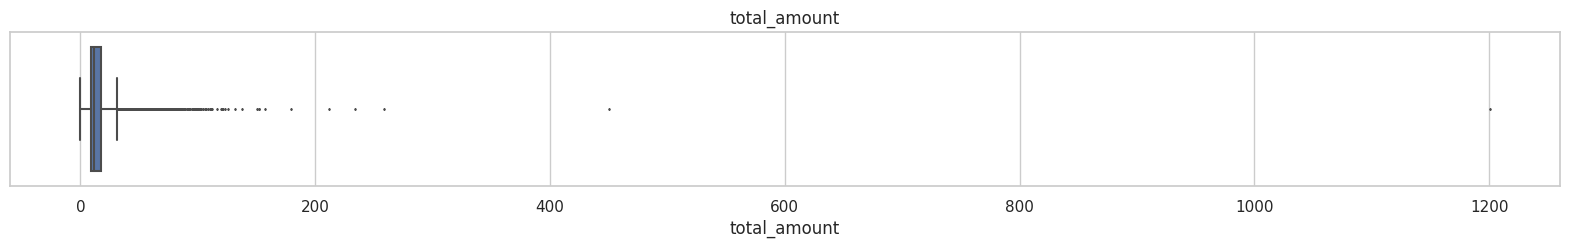

In [154]:
# Create box plot of total_amount
plt.figure(figsize=(20,2))
plt.title('total_amount')
sns.boxplot(x=df['total_amount'], fliersize=1);

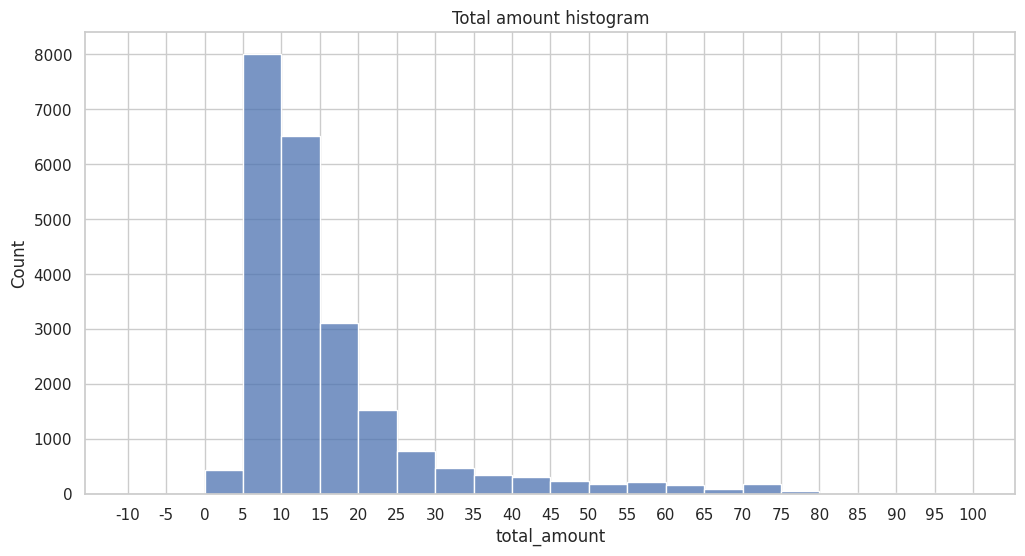

In [155]:
# Create histogram of total_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('Total amount histogram');

Harcama dağılımları genellikle 5 - 30 dolar arasında oluyor 100 dolar üzerindeki sayılar çok ekstrem kalıyor.

- Bu sayıların sebebi veri tabanındaki bir hata olabilir.
- içerik üreticileri taksi ile bir şehirden diğer şehre gitmeyi seçebilir.
Fakat bukadar uç değerler bizim araştırmamızı ve modelimizi kötü etkileyebilir bu değerleri sonrasında düzenleyeceğiz

### Tip amount 

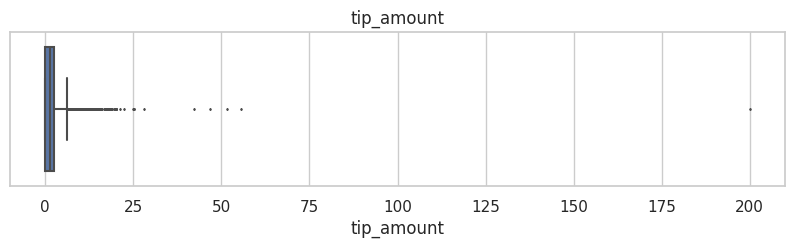

In [156]:
# Create box plot of tip_amount
plt.figure(figsize=(10,2))
plt.title('tip_amount')
sns.boxplot(x=df['tip_amount'], fliersize=1);

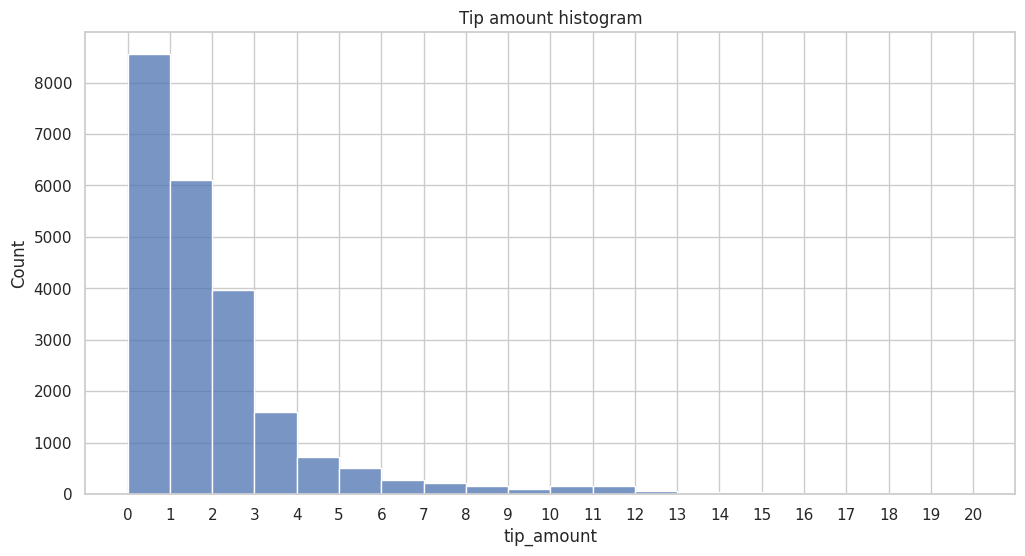

In [157]:
# Create histogram of tip_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount histogram');
plt.show()

Genellikle tiplerin %75 lik dilimi 2 dolar civarında bunu describe metodu ile görebilmiştik. Yaklaşık 5 dolara kadar verilen bahşişler %99 oluşturuyor .
Grafiklerden görülebileceği üzere bahşişler 0 ile 5 arasında yığılıyor özellikle 1-3 arasında

### tip_amount by vendor

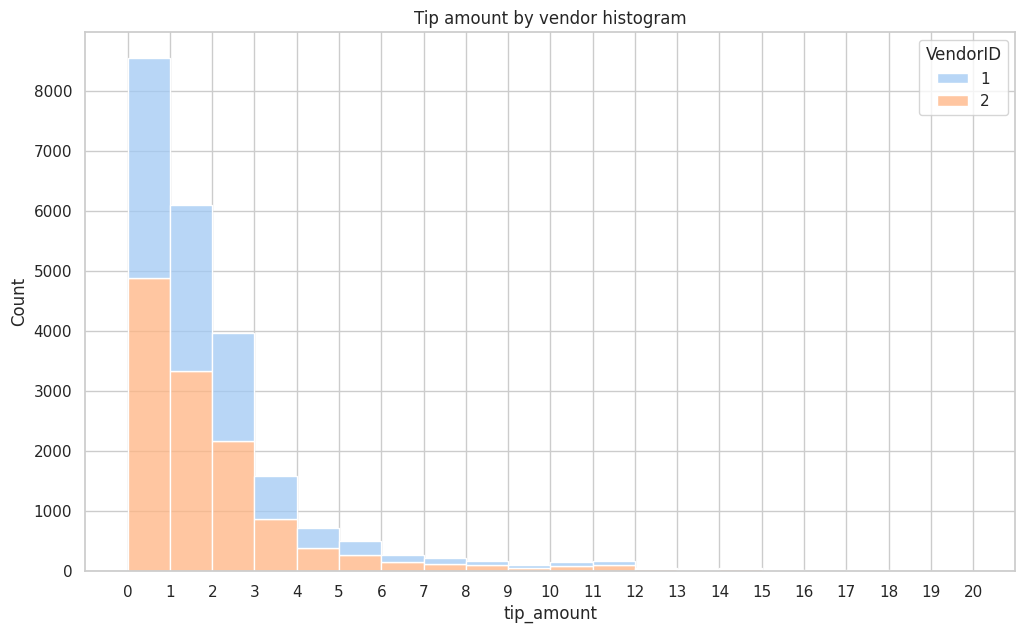

In [158]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram');

### Mean tips by passenger count

In [159]:
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

Çoğunlukla 1 veya 2 kişi biniliyor.
0 kişinin binmesi mantıklı değil bu satır düşürülecek 

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [161]:
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

In [162]:
df[df['passenger_count'] == 0 ]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
1516,96563556,1,2017-11-14 15:45:23,2017-11-14 16:26:38,0,8.8,1,N,138,164,1,33.0,0.0,0.5,5.55,5.76,0.3,45.11
1874,102273749,1,2017-12-03 12:05:52,2017-12-03 12:13:51,0,1.1,1,N,48,237,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80
1925,75654951,1,2017-09-09 03:44:45,2017-09-09 03:49:19,0,0.8,1,N,48,48,2,5.0,0.5,0.5,0.00,0.00,0.3,6.30
3352,107464306,1,2017-12-18 22:44:57,2017-12-18 23:00:24,0,2.7,1,N,87,79,1,12.5,0.5,0.5,2.75,0.00,0.3,16.55
4060,100326273,1,2017-11-27 13:08:01,2017-11-27 13:17:55,0,1.7,1,N,161,239,1,9.0,0.0,0.5,1.95,0.00,0.3,11.75
4919,106693550,1,2017-12-16 14:59:17,2017-12-16 15:21:59,0,3.1,1,N,163,114,1,15.5,0.0,0.5,4.05,0.00,0.3,20.35
5563,74279671,1,2017-09-04 17:40:00,2017-09-04 17:51:52,0,1.3,1,N,164,233,1,9.0,0.0,0.5,1.95,0.00,0.3,11.75
5603,107019016,1,2017-12-17 12:18:49,2017-12-17 12:40:45,0,4.2,1,N,230,211,1,18.0,0.0,0.5,3.75,0.00,0.3,22.55
5668,106785624,1,2017-12-16 19:50:12,2017-12-16 20:00:30,0,1.0,1,N,211,249,1,8.0,0.0,0.5,1.50,0.00,0.3,10.30
5767,83401081,1,2017-10-04 15:17:52,2017-10-04 15:56:26,0,10.4,1,N,113,138,1,34.0,0.0,0.5,8.10,5.76,0.3,48.66


In [163]:
grouped_df = df.groupby('passenger_count')[['tip_amount']].mean()
grouped_df

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


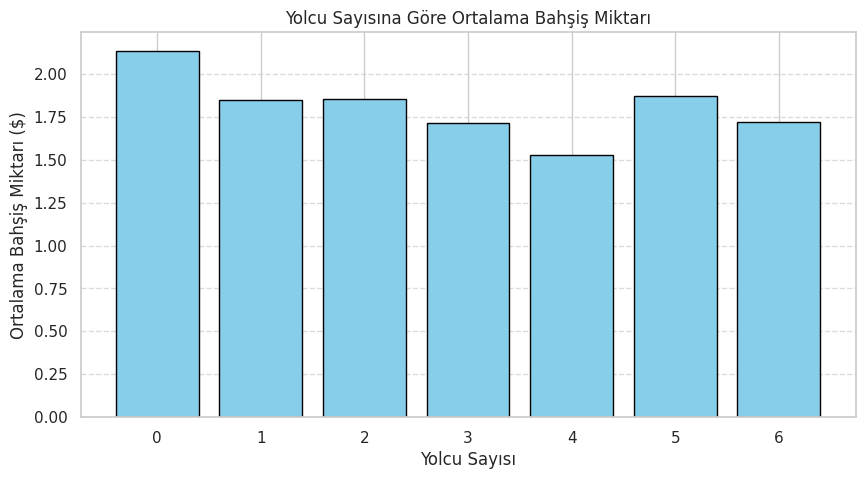

In [164]:
plt.figure(figsize=(10, 5))
plt.bar(grouped_df.index, grouped_df['tip_amount'], color='skyblue', edgecolor='black')
plt.xlabel('Yolcu Sayısı')
plt.ylabel('Ortalama Bahşiş Miktarı ($)')
plt.title('Yolcu Sayısına Göre Ortalama Bahşiş Miktarı')
plt.xticks(grouped_df.index)  # X eksenindeki değerlerin tam sayılar olması için
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Yolcu miktarına göre bahşiş miktarında bir değişme olmuyor tuhaf bir şekilde 4 kişi olunduğunda bahşiş miktarı azalıyor en çok ise bahşiş 1 ve 2 kişi varken oluyor 

In [165]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

In [166]:
monthly_rides = df['month'].value_counts()
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

In [167]:
# Reorder the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

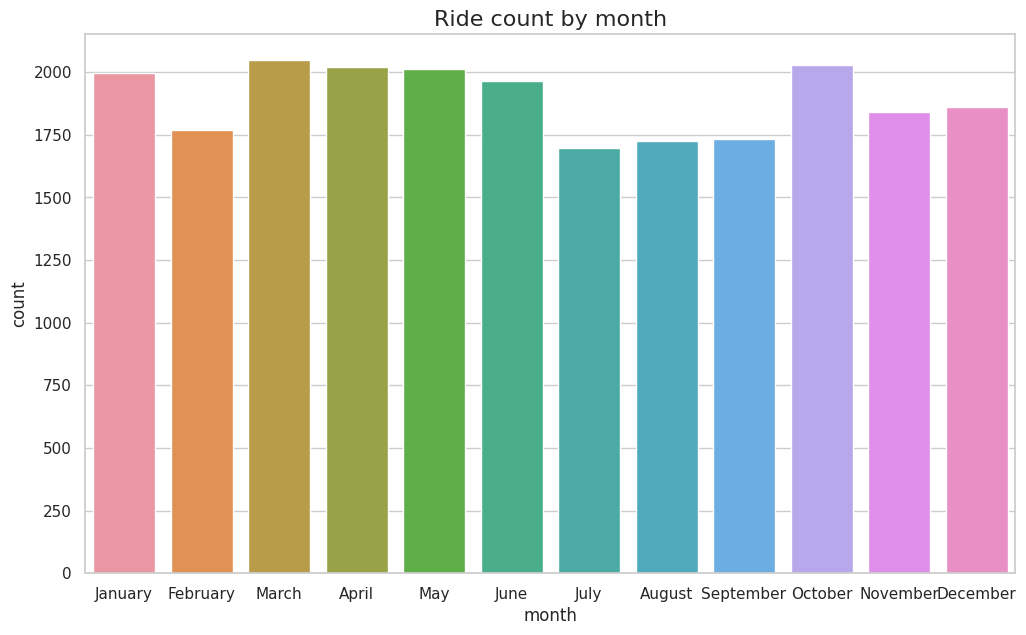

In [168]:
# Create a bar plot of total rides per month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_xticklabels(month_order)
plt.title('Ride count by month', fontsize=16);

Genellikle her ay benzer miktarlarda sürüş yapılıyor yaz aylarında gözle görülür bir azalma oluyor. Bunun sebebi yaz aylarında insanların tatile gitmesi veya yürümeyi, bisiklet sürmeyi tercih etmesi olabilir. 

In [169]:
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

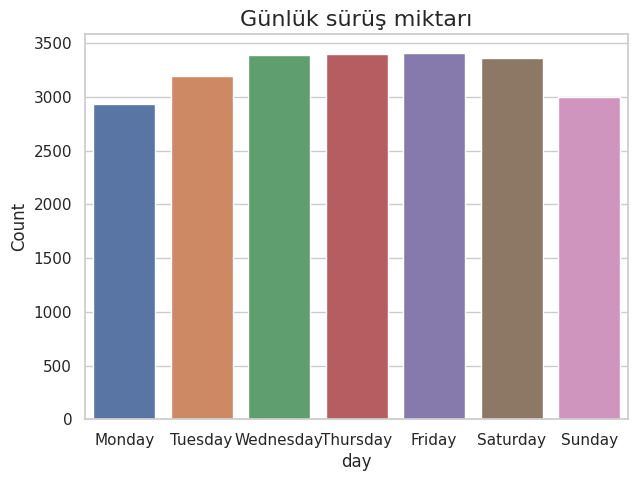

In [170]:
# Create bar plot for ride count by day
plt.figure(figsize=(7,5))
ax = sns.barplot(x=daily_rides.index, y=daily_rides)
ax.set_xticklabels(day_order)
ax.set_ylabel('Count')
plt.title('Günlük sürüş miktarı', fontsize=16);

Pazartesi ve pazar günleri daha az oluyor. Yaklaşık olarak 500 günlük sürüş daha az oluyor geri kalan günler ise neredeyse aynı 

In [171]:
# Repeat the process, this time for total revenue by day
total_amount_day = df.groupby('day')[['total_amount']].sum()
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

,total_amount
day,
Monday,49582.47
Tuesday,52530.94
Wednesday,55317.57
Thursday,57190.51
Friday,55830.34
Saturday,51325.30
Sunday,48634.66


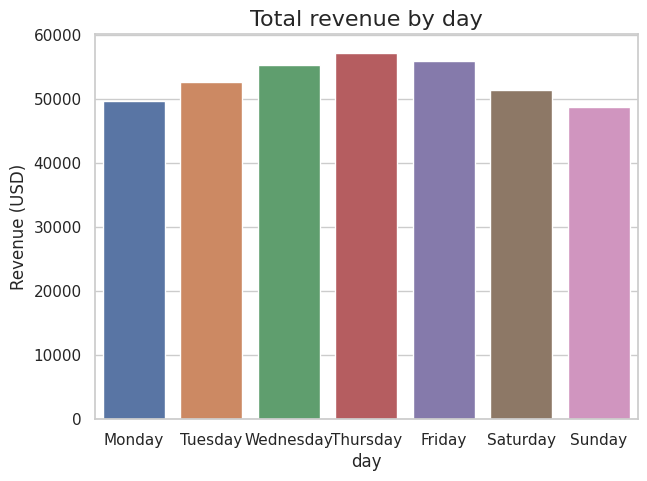

In [172]:
plt.figure(figsize=(7,5))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'])
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day', fontsize=16);

Çarşamba, perşembe ve cuma günleri sürüş sayısı fazlaydı buna bağlı olarak bu günlerde cironunda yüksek olmasını bekleriz. Dikkate değer bir farklılık ise pazartesi günü sürüş sayısı az olsa da ciro daha fazla cumartesi ise tam tersi.

In [173]:
# Günlük olarak ciro / sürüş miktarı ile hangi günün daha karlı olduğunu bulalım 
daily_revenue_per_ride = total_amount_day['total_amount'] / daily_rides
daily_revenue_per_ride

day
Monday       16.916571
Tuesday      16.426185
Wednesday    16.317867
Thursday     16.810850
Friday       16.358142
Saturday     15.243629
Sunday       16.222368
dtype: float64

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.barplot(x=daily_revenue_per_ride.index, y=daily_revenue_per_ride)
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day', fontsize=16);

Buradan görebileceğimiz üzere yaklaşık olarak günlük sürüş başına revenue aynı 

In [ ]:
# Repeat the process, this time for total revenue by month
total_amount_month = df.groupby('month')[['total_amount']].sum()
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

In [ ]:
# Create a bar plot of total revenue by month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'])
plt.title('Total revenue by month', fontsize=16);

Genel olarak aylık kazanç aylık sürüş sayısı ile orantılı diyebiliriz

In [ ]:
# Get number of non unique drop-off location IDs
df['DOLocationID'].nunique()

In [ ]:
# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby('DOLocationID')[['trip_distance']].mean()

# Sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff 

In [ ]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_by_dropoff.index, 
                 y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16);

In [ ]:
df['trip_duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])

In [ ]:
df.head(10)

## Sonuç
### Yapılanlar : 
- Verilerin anlamları için sütun oluşturuldu
- boş satırlar ve sütunlar incelendi temizlendi
- kopyalanmış satır ve sütunlar incelendi temizlendi
- Hatalı değerler düzeltildi
### Sonra yapılacaklar 
- Outliers değerleri bulundu. Görselleştirme işleminden sonra bu deüerleri düzenle
- tpep_pickup_datetime ve tpep_dropoff_datetime arasındaki süre ile geçen zaman için bir değer oluşturulabilir
- Bazı veriler kategorik bunları ML için encoding yapabiliriz. 


# Görev 2 
analyze the relationship between fare amount and payment type.

The goal is to apply descriptive statistics and hypothesis testing in Python. **The goal for this A/B test is to sample data and analyze whether there is a relationship between payment type and fare amount.**  For example: discover if customers who use credit cards pay higher fare amounts than customers who use cash.

## Verilerin anlamlandırılması

In [ ]:
df.head(3)

### payment type inceleyelim 
A numeric code signifying how the passenger paid for the trip.  

1= Credit card 

2= Cash 

3= No charge 

4= Dispute 

5= Unknown 

6= Voided trip

In [ ]:

print( "Ödeme yöntemleri ve sayıları ",df["payment_type"].value_counts())
print( "Ödeme yöntem oranları ",df["payment_type"].value_counts(normalize = True))

Ödemelerin : 
- %67 si kredi kartı ile
- %32 si nakit ile ödeniyor

In [ ]:
# Ödeme türlerine göre ortalama ulaşım ücreti ne kadar ? 
df.groupby('payment_type')['fare_amount'].mean()

## Hipotez testi 
𝐻0
 : There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

𝐻𝐴
 : There is a difference in the average fare amount between customers who use credit cards and customers who use cash.

In [ ]:
# import 
from scipy import stats

In [ ]:
# T testi uygulayacağız
credit_card = df[df['payment_type'] == 1]['fare_amount']
cash = df[df['payment_type'] == 2]['fare_amount']
stats.ttest_ind(a=credit_card, b=cash, equal_var=False)

P değeri 0.05 değerinden daha küçük olduğu için H0 hipotezini reddediyoruz. 
Kredi kartı kullanarak ulaşım ücretini ödeyenler ile nakit ödeyen müşterilerin arasında istatiksel olarak farklılık var 

# Görev 3 
to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. 
**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?


In [ ]:
# Sadece sayısal sütunları seç
numeric_columns = df.select_dtypes(include=['number']).columns

# Korelasyon matrisini hesapla
correlation_matrix = df[numeric_columns].corr()
# Grafik boyutunu ayarla
plt.figure(figsize=(20, 10))

# Korelasyon matrisini çiz
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Başlık ekle
plt.title("Korelasyon Matrisi")

# Grafiği göster
plt.show()

In [ ]:
# Create `duration` column
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')

Doğru orantılı 
- tip_amount
- trip_distance
- tolls_amount
- trip_duration

Ters orantılı - mta_tax

## Outliers düzenleme
Lineer regresyon ile tahmin yaparken outliers modelimizi kötü etkileyebilir bu aşamada outliers değerlerini düzenlemek gerekiyor 

In [ ]:
# Bu değişkenler en çok fiyata etki eden değişkenler
fig, axes = plt.subplots(1, 4, figsize=(20, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df['trip_distance'])
sns.boxplot(ax=axes[1], x=df['fare_amount'])
sns.boxplot(ax=axes[2], x=df['duration'])
sns.boxplot(ax=axes[3], x=df['tip_amount'])
plt.show();

In [ ]:
def outlier_counter(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        # Count the number of outliers
        outliers_count = df[df[col] > upper_threshold][col].count()
        # print(col)
        # print('q3:', q3)
        # print('upper_threshold:', upper_threshold)
        print(f"outliers count -> {col}:",outliers_count )
        # print(df[col].describe())
        
        print()

In [ ]:
outliers_column_list = ["tip_amount", "trip_distance" , "duration","fare_amount"]
outlier_counter(outliers_column_list, 6)

6 IQR da bile yukarıdaki değerlerde veri outliers dışında kalıyor ne yapabiliriz ? 

In [ ]:
df1 = df.copy()

In [ ]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df1.loc[df1[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df1[col].quantile(0.25)
        q3 = df1[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df1.loc[df1[col] > upper_threshold, col] = upper_threshold
        print(df1[col].describe())
        
        print()

In [ ]:
outlier_imputer(outliers_column_list, 6)

## Feature engineering 

In [ ]:
pd.set_option('display.max_columns', None) #tüm columnları görmek için 
df1.head(3)

In [ ]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df1['trip_distance'], y=df1['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x fare amount')
plt.show()

In [ ]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df1['duration'], y=df1['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})

plt.title('Mean duration x fare amount')
plt.show()

### Başlangıç Bitiş noktaları belirle
Kişinin bindiği nokta ile indiği noktayı biliresk arasındaki mesafe ve süre gibi durumlar tahmin edilebilir olacağı için fiyat tahmin etmesi de kolay olacaktır 

In [ ]:
# Create `pickup_dropoff` column
# amacımız başlangıç ve bitiş kordinatları ile özel bir kod oluşturmak bunun için sayısal kordiinat
# değerlerini str dönüştürüyoruz 
df1['pickup_dropoff'] = df1['PULocationID'].astype(str) + ' ' + df1['DOLocationID'].astype(str)
df1['pickup_dropoff'].head(10)

In [ ]:
# Bu özel kodları gruplandırıyoruz ve mesafelerin ortalmasını alıyoruz 
grouped = df1.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped[:10]

In [ ]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

In [ ]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df1['mean_distance'] = df1['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df1['mean_distance'] = df1['mean_distance'].map(grouped_dict)

# Confirm that it worked
df1[(df1['PULocationID']==100) & (df1['DOLocationID']==231)][['mean_distance']]

In [ ]:
grouped = df1.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df1['mean_duration'] = df1['pickup_dropoff']
df1['mean_duration'] = df1['mean_duration'].map(grouped_dict)

# Confirm that it worked
df1[(df1['PULocationID']==100) & (df1['DOLocationID']==231)][['mean_duration']]

### Rush hour 
Bu özellik ile çok fazla acelenin olduğu saatlerdkei ekstrem davranışları görmeyi planlıyoruz

In [ ]:
# Create 'rush_hour' col
df1['rush_hour'] = df1['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df1.loc[df1['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [ ]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [ ]:
# Apply the `rush_hourizer()` function to the new column
df1.loc[(df1.day != 'saturday') & (df1.day != 'sunday'), 'rush_hour'] = df1.apply(rush_hourizer, axis=1)
df1.head()

In [ ]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df1['mean_duration'], y=df1['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x fare amount')
plt.show()

52 dolar seviyesinde sabit sayılar var peki bu ne anlama geliyor olabilir ? 

In [ ]:
df1[df1['fare_amount'] > 50]['fare_amount'].value_counts().head()

In [ ]:
df1[df1['fare_amount'] == 52].head(30)

İlk 30 satırdaki 52 dolarlık ücretlere sahip yolculukların çoğunun 132 numaralı lokasyondan başlaması veya bitmesi dikkat çekiyor. Ayrıca, bu yolculukların hepsinde RatecodeID değeri 2.

132 numaralı lokasyonun neden bu kadar çok 52 dolarlık ücrete sahip olduğu açık değil. Yolculuklar farklı günlerde, farklı saatlerde, farklı satıcılarla ve farklı aylarda gerçekleşmiş. Ancak, birçok yolculukta 5.76 dolar ve 5.54 dolar gibi ücretli geçiş (toll) bedelleri bulunuyor. Bu, 132 numaralı lokasyonun sıkça ücretli geçiş gerektiren bir bölgede olduğunu gösteriyor ve muhtemelen bir havaalanı.

Veri sözlüğü, RatecodeID = 2 değerinin JFK Havaalanı (John F. Kennedy Uluslararası Havalimanı) için uygulandığını belirtiyor. Ayrıca, Google araması, 2017 yılında JFK ile Manhattan arasındaki taksi ücretinin sabit 52 dolar olduğunu gösteriyor.

Bu bilgi sayesinde, RatecodeID = 2 olan veriler model tahminlerinden sonra düzeltilerek doğru hale getirilebilir. Böylece, bu veri noktalarının her zaman doğru olduğu garanti edilir.

## Regresyon için hazırlık

In [ ]:
df1.info()

Önceden de regresyonda nelerin işimize yarayabileceğini bulmuştuk yeni özellikler de ekledik sadece bunlar kalacak şekilde tekrar düzenleyelim 

In [ ]:
corr_matrix = df1.corr(numeric_only=True)

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()

In [ ]:
df2 = df1.copy()

df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month',"trip_duration"
               ], axis=1)

df2.info()

In [ ]:
# Create a pairplot to visualize pairwise relationships between variables in the data
### YOUR CODE HERE ###

sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             );

In [ ]:
df2.corr(method='pearson')
plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

## Regresyon başlangıç

In [ ]:
# Remove the target column from the features
X = df2.drop(columns=['fare_amount'])

# Set y variable
y = df2[['fare_amount']]

# Display first few rows
X.head()

In [ ]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)

# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

In [ ]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

In [ ]:
# Fit your model to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

In [ ]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

## Test sonuçları

In [ ]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

In [ ]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']


In [ ]:
results.head(10)


### Model sonucunu görselleştireim

In [ ]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

#### Residuals
Residuals (hatalar, artıklar), bir regresyon modelinde tahmin edilen değer ile gerçek değer arasındaki farktır.

Matematiksel olarak şu şekilde ifade edilir:

\text{Residual} = \text{Gerçek Değer} - \text{Tahmin Edilen Değer}


🔹 Başka bir deyişle: Modelin yaptığı hatayı ölçer.
🔹 Eğer residual değeri sıfıra yakınsa, model tahminleri doğru yapıyor demektir.
🔹 Eğer residual değeri büyükse, model tahminlerinde hata yapıyor demektir.

In [ ]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

#### Actual vs Predicted values 

Bu grafik, tahmin edilen (predicted) değerler ile residual (hata) değerleri arasındaki ilişkiyi görselleştirmek için kullanılır. Residual plot, bir regresyon modelinin doğruluğunu ve uygunluğunu değerlendirmenin en yaygın yollarından biridir.

In [ ]:
# Create a scatterplot of `residuals` over `predicted`

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

#### coefficients inceleyelim 
Katsayılar (Coefficients), regresyon modellerinde bağımsız değişkenlerin (features) bağımlı değişken (target) üzerindeki etkisini gösterir.
✔ Katsayılar bağımsız değişkenlerin Y üzerindeki etkisini gösterir.
✔ Pozitif katsayılar → O değişken arttıkça Y de artar.
✔ Negatif katsayılar → O değişken arttıkça Y azalır.

In [ ]:
# Get model coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

Bu örneğe göre mean_distance asıl etkili olan değişken sonrasında ise mean_duration geliyor diyebiliriz katsayılara bakarak

In [ ]:
X_scaled = scaler.transform(X)
y_preds_full = lr.predict(X_scaled)

In [ ]:
# Create a new df containing just the RatecodeID col from the whole dataset
final_preds = df1[['RatecodeID']].copy()

# Add a column containing all the predictions
final_preds['y_preds_full'] = y_preds_full

# Impute a prediction of 52 at all rows where RatecodeID == 2
final_preds.loc[final_preds['RatecodeID']==2, 'y_preds_full'] = 52

# Check that it worked
final_preds[final_preds['RatecodeID']==2].head()

In [ ]:
final_preds = final_preds['y_preds_full']
print('R^2:', r2_score(y, final_preds))
print('MAE:', mean_absolute_error(y, final_preds))
print('MSE:', mean_squared_error(y, final_preds))
print('RMSE:',np.sqrt(mean_squared_error(y, final_preds)))

In [ ]:
# Combine means columns with predictions column
nyc_preds_means = df1[['mean_duration', 'mean_distance']].copy()
nyc_preds_means['predicted_fare'] = final_preds

nyc_preds_means.head()

🔹 Burada yapılan hata:
	•	mean_distance ve mean_duration sütunları tüm veri üzerinden hesaplandı, yani test verisi de dahil edildi.
	•	Ancak bu sütunlar modelin girdi (feature) değişkenleri olarak kullanıldı.
	•	Yani model, test setinde yer alan bazı bilgileri zaten öğrenmiş oldu ve test performansı gerçekte olduğundan daha iyi çıktı.

🔹 Bunun sonucu:
	•	R² skoru aslında olması gerekenden ~0.03 daha yüksek çıktı.
	•	Model, gerçek dünyada bu kadar iyi çalışmayabilir.

🔹 Doğru yöntem:
✔ Bu sütunlar yalnızca eğitim seti üzerinden hesaplanmalıydı.
✔ Test setine aktarılırken, yalnızca eğitim setinde hesaplanan değerler kullanılmalıydı.
✔ Ancak bu, test setinde bazı eksik (NaN) değerlerin oluşmasına sebep olabilir, bu da ayrı bir şekilde ele alınmalıdır.

📌 SONUÇ
	1.	Veri kaçağına dikkat et: Test verisini yanlışlıkla eğitim sürecine dahil etme.
	2.	Eksik verileri model eğitmeden önce doldur: Sonradan doldurup modeli tekrar test etmek yanlış sonuç verebilir.
	3.	Gerçek projelerde veri akışı otomatik hale getirilir: Büyük projelerde her adımı manuel yapmak yerine makine öğrenmesi pipeline’ları kullanılır.

# Görev 4 ML
In this activity, you will practice using tree-based modeling techniques to predict on a binary target class.

The purpose of this model is to find ways to generate more revenue for taxi cab drivers.

The goal of this model is to predict whether or not a customer is a generous tipper.

## Feature Engineering 
### tip_percent 

In [ ]:
# Cömert bahşiş bırakanları bulalım
df1['tip_percent'] = round(df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount']), 3)
df1['tip_percent'].head(10)

In [ ]:
df1['tip_percent'] = df1['tip_percent'].fillna(0)  # Eksik değerleri 0 olarak doldur

df1['generous'] = (df1['tip_percent'] >= 0.2).astype(int)  # Boolean'ı integer'a çevir

In [ ]:
# Create 'generous' col (target)
# Bu kişilerin cömert olup olmadığını kategori edelim %20 üstü verenler cömerttir
df1['generous'] = df1['tip_percent']
df1['generous'] = (df1['generous'] >= 0.2)
df1['generous'] = df1['generous'].astype(int)

### Rush hours 

In [ ]:
# Create 'am_rush' col
df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'daytime' col
df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'pm_rush' col
df1['pm_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'nighttime' col
df1['nighttime'] = df1['tpep_pickup_datetime'].dt.hour

# Define 'am_rush()' conversion function [06:00–10:00)
def am_rush(hour):
    if 6 <= hour['am_rush'] < 10:
        val = 1
    else:
        val = 0
    return val
    
# Apply 'am_rush' function to the 'am_rush' series
df1['am_rush'] = df1.apply(am_rush, axis=1)
df1['am_rush'].head()

In [ ]:
# Define 'daytime()' conversion function [10:00–16:00)
def daytime(hour):
    if 10 <= hour['daytime'] < 16:
        val = 1
    else:
        val = 0
    return val

# Apply 'daytime' function to the 'daytime' series
df1['daytime'] = df1.apply(daytime, axis=1)

In [ ]:
# Define 'pm_rush()' conversion function [16:00–20:00)
def pm_rush(hour):
    if 16 <= hour['pm_rush'] < 20:
        val = 1
    else:
        val = 0
    return val

# Apply 'pm_rush' function to the 'pm_rush' series
df1['pm_rush'] = df1.apply(pm_rush, axis=1)

In [ ]:
# Define 'nighttime()' conversion function [20:00–06:00)
def nighttime(hour):
    if 20 <= hour['nighttime'] < 24:
        val = 1
    elif 0 <= hour['nighttime'] < 6:
        val = 1
    else:
        val = 0
    return val

# Apply 'nighttime' function to the 'nighttime' series
df1['nighttime'] = df1.apply(nighttime, axis=1)

In [ ]:
df1["payment_type"].value_counts()

Ücreti nakit verenlerin tip miktarı belki sisteme girilmemiş olabilir bu da veride dengesizlik oluşturabilir bunu bi inceleyyelim 

In [ ]:
credid_card_customer = df1[df1["payment_type"] == 1]
cash_customer = df1[df1["payment_type"] == 2]



In [ ]:
credid_card_customer

In [ ]:
cash_customer

In [ ]:
print("Kredi kartı ile ödemelerdeki ortalama miktar",credid_card_customer["tip_amount"].mean())
print("Cah ödemelerdeki ortalama miktar",cash_customer["tip_amount"].mean())


Doğru tahmin bu yüzden cash ödemelerdeki kullanıcıları çıkartalım sadece kredi kartı kalsın

In [ ]:
# Ml için yeni bir değişken oluşturalım 
df3 = df1.copy()
df3 = df1[df1['payment_type']==1]
# Drop columns
drop_cols = ['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'payment_type', 'trip_distance', 'store_and_fwd_flag', 'payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
             'improvement_surcharge', 'total_amount', 'tip_percent',"rush_hour","duration","trip_duration"]

df3 = df3.drop(drop_cols, axis=1)
df3.info()


### variable encoding 
şimdi string değerlerimizi bool veya int yapalım

In [ ]:
# 1. Define list of cols to convert to string
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']

# 2. Convert each column to string
for col in cols_to_str:
    df3[col] = df3[col].astype('str')

# Convert categoricals to binary
df3 = pd.get_dummies(df3, drop_first=True)
df3.info()

In [ ]:
# Get class balance of 'generous' col
df3['generous'].value_counts(normalize=True)

In [ ]:
df3.info()

## Model oluşturmaya başlayalım 

In [ ]:
# Isolate target variable (y)
y = df3['generous']

# Isolate the features (X)
X = df3.drop('generous', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
# En iyi hiperparametrelerle Random Forest modeli oluştur
rf1 = RandomForestClassifier(
    max_depth=None,
    max_features=1.0,
    max_samples=0.7,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42,
    n_jobs=-1  # Tüm CPU çekirdeklerini kullan
)

In [ ]:
%%time
rf1.fit(X_train, y_train)

In [ ]:
import pickle 

# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [ ]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [ ]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [ ]:
# Get scores on test data
rf_preds = rf1.predict(X_test)

In [ ]:
print(rf_test_scores)